<a href="https://colab.research.google.com/github/leyixu21/master_thesis/blob/main/process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparations

In [ ]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from flickrapi import FlickrAPI
import pandas as pd
from pandas.io.formats.format import NA
import numpy as np
import datetime
import re
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import pickle
import folium
import geopandas as gpd


In [ ]:
# set paths
path='/content/drive/MyDrive/master_thesis_data/flickr/'
path_semi = '/content/drive/MyDrive/master_thesis_data/flickr/semi_cleaned/'

# Process data

### Get Flickr data within the Buffer

In [ ]:
from shapely.geometry import Point

In [ ]:
c = {'col1': ['pub', 'middle school'], 'geometry': [Point(-0.09055, 51.49804), Point(-0.24022, 51.48726)]}
c = gpd.GeoDataFrame(c)
c = c.set_crs('epsg:4326')

c.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

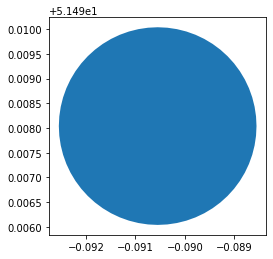

In [ ]:
s = gpd.GeoSeries(c['geometry'][0])

b = s.buffer(0.002)
b.plot()

In [ ]:
b_gdf = gpd.GeoDataFrame()
b_gdf['geometry'] = b
b_gdf = b_gdf.set_crs('epsg:4326')

In [ ]:
import folium

m = folium.Map(location=[51.49804, -0.09055], zoom_start=10, tiles='CartoDB positron')

sim_geo = gpd.GeoSeries(b_gdf['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()
geo_j = folium.GeoJson(data=geo_j,
                        style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(m)

m

In [ ]:
gdf_in = gdf[gdf.within(b_gdf['geometry'][0])]